In [80]:
import time
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from testCases_v4 import *
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward

get_ipython().magic('matplotlib inline')

In [81]:
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


hi5
(209, 64, 64, 3)
y = 0. It's a non-cat picture.


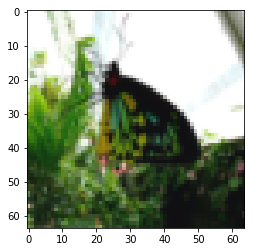

In [82]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_dataset()

index = 16
plt.imshow(train_x_orig[index])
print(train_x_orig.shape)
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")


In [83]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Número de ejemplos de entrenamiento: " + str(m_train))
print ("Número de ejemplos de prueba: " + str(m_test))
print ("Tamaño de cada imagen: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))


Número de ejemplos de entrenamiento: 209
Número de ejemplos de prueba: 50
Tamaño de cada imagen: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [84]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T  
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [85]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(1)
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y, 1))
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    parameters = {"W1": W1,
                "b1": b1,
                "W2": W2,
                "b2": b2}
    return parameters 
#Probando la función
parameters = initialize_parameters(3,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.01744812 -0.00761207]]
b2 = [[0.]]


In [86]:
def initialize_parameters_deep(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
       
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))

        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

    return parameters

parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]


In [87]:
def linear_forward(A, W, b):

    Z = np.dot(W,A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache
#Probando la función
A, W, b = linear_forward_test_case()
Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))


Z = [[ 3.26295337 -1.23429987]]


In [88]:
def linear_activation_forward(A_prev, W, b, activation):

    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)

    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

A_prev, W, b = linear_activation_forward_test_case()
A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))


With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]


In [89]:
def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2 #número de capas de la red
    caches = list()
    
    # Implemente [LINEAR -> RELU]*(L-1). Agregue "cache" a la lista "caches" 
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        #caches.append(cache)
    
    # Implementa LINEAR -> SIGMOID. Agregue "cache" a la lista "caches".
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)],parameters['b' + str(L)], activation = "sigmoid")
    #caches.append(cache)

    assert(AL.shape == (1,X.shape[1]))        
    return AL, caches

#Probando la función
X, parameters = L_model_forward_test_case_2hidden()
print(parameters)
print(len(parameters)//2)
print("W"+str(2))
AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))
print("-----"+str(parameters))

{'W1': array([[ 0.35480861,  1.81259031, -1.3564758 , -0.46363197,  0.82465384],
       [-1.17643148,  1.56448966,  0.71270509, -0.1810066 ,  0.53419953],
       [-0.58661296, -1.48185327,  0.85724762,  0.94309899,  0.11444143],
       [-0.02195668, -2.12714455, -0.83440747, -0.46550831,  0.23371059]]), 'b1': array([[ 1.38503523],
       [-0.51962709],
       [-0.78015214],
       [ 0.95560959]]), 'W2': array([[-0.12673638, -1.36861282,  1.21848065, -0.85750144],
       [-0.56147088, -1.0335199 ,  0.35877096,  1.07368134],
       [-0.37550472,  0.39636757, -0.47144628,  2.33660781]]), 'b2': array([[ 1.50278553],
       [-0.59545972],
       [ 0.52834106]]), 'W3': array([[ 0.9398248 ,  0.42628539, -0.75815703]]), 'b3': array([[-0.16236698]])}
3
W2
AL = [[0.03921668 0.70498921 0.19734387 0.04728177]]
Length of caches list = 0
-----{'W1': array([[ 0.35480861,  1.81259031, -1.3564758 , -0.46363197,  0.82465384],
       [-1.17643148,  1.56448966,  0.71270509, -0.1810066 ,  0.53419953],
    

In [90]:
def compute_cost(AL, Y):
    m = Y.shape[1]

    cost = -1 / m *(np.dot(Y,np.log(AL.T)) + np.dot(1 - Y,np.log(1 - AL).T))
    
    cost = np.squeeze(cost)      
    assert(cost.shape == ())
    
    return cost
Y, AL = compute_cost_test_case()

print("cost = " + str(compute_cost(AL, Y)))

cost = 0.41493159961539694


In [91]:
def linear_backward(dZ, cache):

    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1 / m * (np.dot(dZ,A_prev.T))
    db = 1 / m * (np.sum(dZ,axis = 1,keepdims = True))
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

dZ, linear_cache = linear_backward_test_case()
dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.10076895  1.40685096  1.64992505]]
db = [[0.50629448]]


In [92]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
                
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
    
    return dA_prev, dW, db

AL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989 -0.        ]
 [ 0.37883606 -0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


In [93]:
def L_model_backward(AL, Y, caches):

    grads = {}
    L = len(caches) 
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)     

    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print_grads(grads)

dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]


In [94]:
def update_parameters(parameters, grads, learning_rate):

    L = len(parameters) // 2

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW"+ str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db"+ str(l+1)]

    return parameters

parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


In [95]:
n_x = 12288    
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

Cost after iteration 0: 0.6930497356599888
Cost after iteration 100: 0.6457898953839779
Cost after iteration 200: 0.6295685115617379
Cost after iteration 300: 0.5937224012715145
Cost after iteration 400: 0.5488060683040056
Cost after iteration 500: 0.5015928620791906
Cost after iteration 600: 0.4659192774265815
Cost after iteration 700: 0.4122004912685614
Cost after iteration 800: 0.3929120828915468
Cost after iteration 900: 0.3641260895646914
Cost after iteration 1000: 0.3182282439335294
Cost after iteration 1100: 0.272634782280334
Cost after iteration 1200: 0.24570699849388797
Cost after iteration 1300: 0.259136384457822
Cost after iteration 1400: 0.18056085451361953
Cost after iteration 1500: 0.20806190490797322
Cost after iteration 1600: 0.11977231109633615
Cost after iteration 1700: 0.10495335335491435
Cost after iteration 1800: 0.08821142431390691
Cost after iteration 1900: 0.07727944853026515
Cost after iteration 2000: 0.06729536469278893
Cost after iteration 2100: 0.05995116387

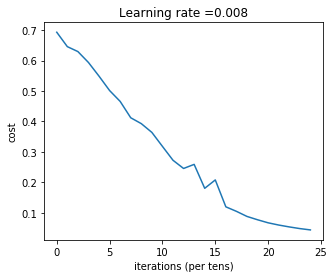

In [96]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.008, num_iterations = 3000, print_cost=False):

    np.random.seed(1)
    grads = {}
    costs = []                              
    m = X.shape[1]                          
    (n_x, n_h, n_y) = layers_dims
    
    parameters = initialize_parameters(n_x, n_h, n_y)

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    for i in range(0, num_iterations):

        A1, cache1 = linear_activation_forward(X, W1, b1, activation = "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation = "sigmoid")

        cost = compute_cost(A2, Y)

        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation = "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation = "relu")
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2

        parameters = update_parameters(parameters, grads, learning_rate)

        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

In [98]:
def predict(X, y, parameters):
    m = X.shape[1]
    n = len(parameters) // 2
    p = np.zeros((1,m))

    probas, caches = L_model_forward(X, parameters)

    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p
print ("pred_train :")
predictions_train = predict(train_x, train_y, parameters)
print ("pred_test :")
predictions_test = predict(test_x, test_y, parameters)


pred_train :
Accuracy: 0.9999999999999998
pred_test :
Accuracy: 0.72
